In [1]:
# API Key:
# LX71H2XX0HSO5PAO 

In [18]:
import requests
import json
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=CRM&outputsize=full&apikey=LX71H2XX0HSO5PAO'
resp = requests.get(url)
resp.json()['Meta Data']

{'1. Information': 'Daily Time Series with Splits and Dividend Events',
 '2. Symbol': 'CRM',
 '3. Last Refreshed': '2020-02-12',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

In [3]:
df = pd.DataFrame(resp.json()['Time Series (Daily)'])

In [5]:
df.tail()

,2020-02-12,2020-02-11,2020-02-10,2020-02-07,2020-02-06,2020-02-05,2020-02-04,2020-02-03,2020-01-31,2020-01-30,...,2004-07-07,2004-07-06,2004-07-02,2004-07-01,2004-06-30,2004-06-29,2004-06-28,2004-06-25,2004-06-24,2004-06-23
4. close,189.4600,189.1100,189.1200,185.7200,186.7300,185.4900,188.3400,185.4200,182.3100,185.6700,...,16.3100,17.0000,16.9800,16.0300,16.0700,16.4000,16.0000,15.8000,16.7600,17.2000
5. adjusted close,189.4600,189.1100,189.1200,185.7200,186.7300,185.4900,188.3400,185.4200,182.3100,185.6700,...,4.0775,4.2500,4.2450,4.0075,4.0175,4.1000,4.0000,3.9500,4.1900,4.3000
6. volume,4533345,4298229,3872433,3712487,4102710,6161868,3982723,4755057,4190229,3715639,...,446900,304200,248300,438700,521900,528000,567700,1677500,2221800,10893600
7. dividend amount,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8. split coefficient,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [10]:
pd.to_datetime(df.columns)
df_transposed = df.transpose().set_index(df.columns)

In [11]:
df_transposed

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2020-02-12,189.7100,190.5200,186.7700,189.4600,189.4600,4533345,0.0000,1.0000
2020-02-11,191.4800,192.6000,188.6500,189.1100,189.1100,4298229,0.0000,1.0000
2020-02-10,186.1700,189.2700,185.5618,189.1200,189.1200,3872433,0.0000,1.0000
2020-02-07,186.8500,188.6500,185.6500,185.7200,185.7200,3712487,0.0000,1.0000
2020-02-06,186.8300,187.5600,184.2400,186.7300,186.7300,4102710,0.0000,1.0000
...,...,...,...,...,...,...,...,...
2004-06-29,16.0000,16.7000,15.8300,16.4000,4.1000,528000,0.0000,1.0000
2004-06-28,16.0000,16.2100,15.4360,16.0000,4.0000,567700,0.0000,1.0000
2004-06-25,16.5100,16.7500,15.7900,15.8000,3.9500,1677500,0.0000,1.0000
2004-06-24,17.5500,17.6900,16.5000,16.7600,4.1900,2221800,0.0000,1.0000


In [15]:
df_transposed.drop(columns=['1. open','2. high', '3. low', '4. close','7. dividend amount','8. split coefficient'],inplace=True)

In [16]:
df_transposed

,5. adjusted close,6. volume
2020-02-12,189.4600,4533345
2020-02-11,189.1100,4298229
2020-02-10,189.1200,3872433
2020-02-07,185.7200,3712487
2020-02-06,186.7300,4102710
...,...,...
2004-06-29,4.1000,528000
2004-06-28,4.0000,567700
2004-06-25,3.9500,1677500
2004-06-24,4.1900,2221800


In [26]:
df_transposed['5. adjusted close'] = df_transposed['5. adjusted close'].astype(float)
df_transposed['6. volume'] = df_transposed['6. volume'].astype(float)

In [41]:
df_transposed.sort_index(ascending=True,inplace=True)

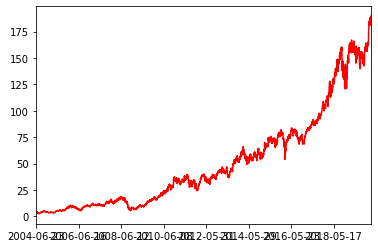

In [43]:
df_transposed['5. adjusted close'].plot(kind='line',color='red')